Date: __June 2021__

Author: S. Di Pede

For more details, look at https://wiki.nikhef.nl/xenon/doku.php?id=serena:gcf_flow_meter.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np


import scipy.optimize as optimization
from scipy import stats
from scipy.stats import norm
import matplotlib.dates as mdates

from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from IPython.display import HTML
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import datetime
# from datetime import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#Read in data
infile_7 = 'data/7-6-2021'
infile_8 = 'data/8-6-2021'

indata_7 = open(infile_7)
indata_8 = open(infile_8)

p_det = []
p_low = []
p_high = []
time_stamp = []
unix_time = []
count = 0
flowrate = []
df = []
tijd = []
temp_15 = []

for line in indata_7:
    
    aa = line.split()
    a  = [ahelp.replace(',','.') for ahelp in aa] 
    df.append(a)
    
    if len(a) == 43: # I had to change this value because now we also print the GCF
        
        p_det.append(float(a[24]))
        p_low.append(float(a[25]))
        p_high.append(float(a[26]))
        flowrate.append(float(a[27]))
#         temp_15.append(float[a[16]])

        tijd.append(a[1])
        a1 = a[0].split('-')
        a2 = a[1].split(':')

        time = datetime.datetime(int(a1[2]),int(a1[1]),int(a1[0]),
                                 int(a2[0]),int(a2[1]),int(a2[2])).timestamp()
        
        if count == 0: start_time = time
        time_stamp.append(time-start_time)
        unix_time.append(time)
        count = count +1

#print(tijd)

p_det2 = []
p_low2 = []
p_high2 = []
time_stamp2 = []
unix_time2 = []
count2 = 0
flowrate2 = []
df2 = []
tijd2 = []
temp_15_2 = []

for line in indata_8:
    
    aa2 = line.split()
    a_  = [ahelp2.replace(',','.') for ahelp2 in aa2] 
    df2.append(a_)
    
    if len(a_) == 43: # I had to change this value because now we also print the GCF
        
        p_det2.append(float(a_[24]))
        p_low2.append(float(a_[25]))
        p_high2.append(float(a_[26]))
        flowrate2.append(float(a_[27]))
#         temp_15.append(float[a[16]])

        tijd2.append(a_[1])
        a1_ = a_[0].split('-')
        a2_ = a_[1].split(':')

        time2 = datetime.datetime(int(a1_[2]),int(a1_[1]),int(a1_[0]),
                                 int(a2_[0]),int(a2_[1]),int(a2_[2])).timestamp()
        
        if count2 == 0: start_time2 = time2
        time_stamp2.append(time2-start_time2)
        unix_time2.append(time2)
        count2 = count2 +1
#print(tijd)

In [3]:
# HOURS OF MEASUREMENT LIST
#---------------------------------------------------------------------------------------------------------------------------------

from datetime import datetime

time_list = []
for x in unix_time:
    dt_object = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list.append(dt_object)
#print(time_list)

time_list2 = []
for x in unix_time2:
    dt_object2 = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list2.append(dt_object2)
#print(time_list)

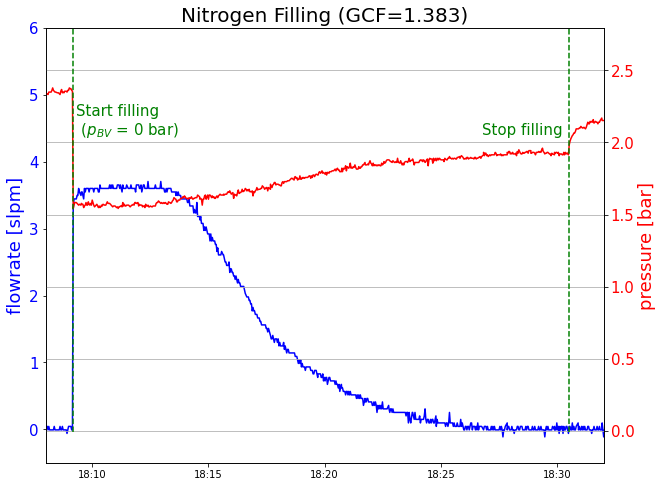

In [4]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi_ = dt.datetime(2021, 6, 7, 18, 8)
rightNi_ = dt.datetime(2021, 6, 7, 18, 32)

plt.gca().set_xbound(leftNi_, rightNi_)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi_, rightNi_)
plt.yticks(fontsize = 15, color='red')

x_00 = dt.datetime(2021, 6, 7, 18, 9,10)
x_00_ = dt.datetime(2021, 6, 7, 18, 9,18)
x_11 = dt.datetime(2021, 6, 7, 18, 13,40)
x_22 = dt.datetime(2021, 6, 7, 18, 20)
x_33 = dt.datetime(2021, 6, 7, 18, 30,30)
x_33_ = dt.datetime(2021, 6, 7, 18, 26, 45)


plt.axvline(x_00, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_11, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_22, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_33, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

x_pos = x_00_
x_pos2_ = x_33_
y_pos = 2.05
plt.text(x_pos, y_pos, "Start filling \n ($p_{BV}$ = 0 bar)", color='green',fontsize=15)
plt.text(x_pos2_, y_pos, "Stop filling", color='green',fontsize=15)


plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.383)', fontsize = 20)

plt.grid()
plt.savefig("N2_filling_1.383.png")

plt.show()

In [5]:
################################################################################################################################
#Integrated flow and standard deviation
################################################################################################################################
def integrated_flow(x_values, y_values, lb, ub): 
    
    integrated_flow = []
    #print(f'left bound is {lb}, right bound is {ub}')
    #dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub: 
            integrated_flow.append(y_values[count])
    
    res = (sum((integrated_flow)*2)/60)
    
    # Standard deviation
    mean = (sum(integrated_flow)/len(integrated_flow))
    dev = [(x - mean) ** 2 for x in integrated_flow]
    variance = sum(dev) / len(integrated_flow)
    std_dev_mean = np.sqrt(variance)  
    
    print(f'Integrated flow: {res} +- {std_dev_mean} SL')
    
    return res, std_dev_mean

################################################################################################################################
#Mean flow and standard deviation
################################################################################################################################

def mean_fl(x_values, y_values, lb, ub):
    
    flow = []

    #print(f'left bound is {lb}, right bound is {ub}')
    #dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        
        if x_values[count] >= lb and x_values[count] <= ub: 
            flow.append(y_values[count])
            
    num_values_flow = len(flow)
    mean = (sum(flow)/num_values_flow)
    
    # Standard deviation
    dev = [(x - mean) ** 2 for x in flow]
    variance = sum(dev) / num_values_flow
    std_dev = np.sqrt(variance)

    return mean, std_dev

################################################################################################################################
#Delta p Calculation
################################################################################################################################
p_start_bottle = 0 # the bottle is in vacuum when we start

def delta_p(x_values, y_values, lb, ub, p_values): 
    
    integrated_flow = []
    p_sum = []
    #print(f'left bound is {lb}, right bound is {ub}')
    dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub:             
            integrated_flow.append(y_values[count])
            p_sum.append(p_values[count])
    
    #p_max = p_sum[0]
    p_min = p_sum[-1]
    delta_p = p_min - p_start_bottle
    p_res = [p_min, delta_p]
    #print(f'P supply = {p_max} bar')
    print(f'P end = {p_min} bar')
    print(f'delta_p is = {delta_p} +- 0.001 bar')
    
    return p_res

In [6]:
# The first Nitrogen measurement had the GCF set to 1.383, so we need to reset the flow values
new_flowrate = []

for i in range(0, len(flowrate)):
    new_flowrate.append(flowrate[i]*1.383)

In [7]:
print(f'Nitrogen result (GCF=1.383)')

result = []
result_std = []
result2 = []
result2_std = []
result3 = []
result3_std = []

print(f'First interval:')
result, result_std = integrated_flow(time_list, new_flowrate, x_00, x_11)
print(f'Second interval:')
result2, result2_std = integrated_flow(time_list, new_flowrate, x_11, x_22)
print(f'Third interval:')
result3, result3_std = integrated_flow(time_list, new_flowrate, x_22, x_33)
print(f'\nTot result')
tot_int_flow = result + result2 + result3
std_flow = result_std + result2_std + result3_std

print(f'Integrated flow: {tot_int_flow} += {std_flow} SL')
print(f'Check integrated flow (the whole interval):')
result_check, std_check = integrated_flow(time_list, new_flowrate, x_00, x_33)
mean_flowNi, mean_std_flowNi = mean_fl(time_list, new_flowrate, x_00, x_33)
print(f'\nMean flow: {mean_flowNi} +- {mean_std_flowNi} slpm')

print(f'\nPressure results:')
p_ress = delta_p(time_list, new_flowrate, x_00, x_33, p_low)

Nitrogen result (GCF=1.383)
First interval:
Integrated flow: 22.005373999999954 +- 0.07566444764518213 SL
Second interval:
Integrated flow: 17.21447760000002 +- 1.2265399005512516 SL
Third interval:
Integrated flow: 2.664764399999995 +- 0.3048044909437562 SL

Tot result
Integrated flow: 41.884615999999966 += 1.60700883914019 SL
Check integrated flow (the whole interval):
Integrated flow: 41.723450400000054 +- 2.001693178685127 SL

Mean flow: 1.9899896852146286 +- 2.001693178685127 slpm

Pressure results:
P end = 1.914 bar
delta_p is = 1.914 +- 0.001 bar


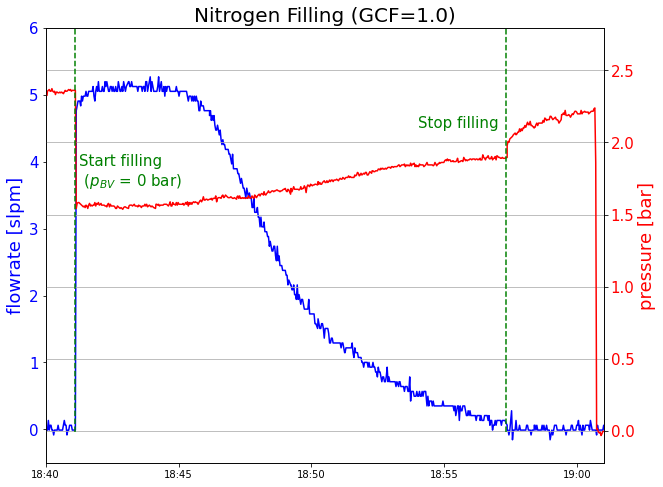

In [8]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi2 = dt.datetime(2021, 6, 7, 18, 40)
rightNi2 = dt.datetime(2021, 6, 7, 19,1)

plt.gca().set_xbound(leftNi2, rightNi2)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi2, rightNi2)
plt.yticks(fontsize = 15, color='red')

x_0 = dt.datetime(2021, 6, 7, 18, 41,7)
x_0_ = dt.datetime(2021, 6, 7, 18, 41,15)
x_1 = dt.datetime(2021, 6, 7, 18, 46)
x_2 = dt.datetime(2021, 6, 7, 18, 51)
x_3 = dt.datetime(2021, 6, 7, 18,57,20)
x_3_ = dt.datetime(2021, 6, 7, 18,54)

plt.axvline(x_0, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_1, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_2, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

x_pos = x_0_
x_pos2_ = x_3_
y_pos = 1.7
y_pos2 = 2.1
plt.text(x_pos, y_pos, "Start filling \n ($p_{BV}$ = 0 bar)", color='green',fontsize=15)
plt.text(x_pos2_, y_pos2, "Stop filling", color='green',fontsize=15)

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.0)', fontsize = 20)

plt.grid()
plt.savefig("N2_filling_1.png")

plt.show()

In [9]:
print(f'Nitrogen result (GCF=1)')

result_ = []
result_std_ = []
result2_ = []
result2_std_ = []
result3_ = []
result3_std_ = []

print(f'First interval:')
result_, result_std_  = integrated_flow(time_list, flowrate, x_0, x_1)
print(f'Second interval:')
result2_, result2_std_ = integrated_flow(time_list, flowrate, x_1, x_2)
print(f'Third interval:')
result3_, result3_std_  = integrated_flow(time_list, flowrate, x_2, x_3)
print(f'\nTot result')
tot_int_flow_ = result_ + result2_ + result3_
std_flow_ = result_std_ + result2_std_ + result3_std_

print(f'Integrated flow: {tot_int_flow_} += {std_flow_} SL')

print(f'Check integrated flow (the whole interval):')
result_check_, std_check_ = integrated_flow(time_list, flowrate, x_0, x_3)
mean_flowNi_, mean_std_flowNi_ = mean_fl(time_list, flowrate, x_0, x_3)
print(f'Mean flow: {mean_flowNi_} +- {mean_std_flowNi_} slpm')

print(f'\nPressure results:')
p_ress_ = delta_p(time_list, flowrate, x_0, x_3, p_low)

Nitrogen result (GCF=1)
First interval:
Integrated flow: 24.234599999999993 +- 0.4312995723321966 SL
Second interval:
Integrated flow: 14.11696666666668 +- 1.097424714738885 SL
Third interval:
Integrated flow: 3.507433333333326 +- 0.358011352449977 SL

Tot result
Integrated flow: 41.858999999999995 += 1.8867356395210586 SL
Check integrated flow (the whole interval):
Integrated flow: 41.700233333333124 +- 1.9668261932951578 SL
Mean flow: 2.617169456066943 +- 1.9668261932951578 slpm

Pressure results:
P end = 1.89 bar
delta_p is = 1.89 +- 0.001 bar


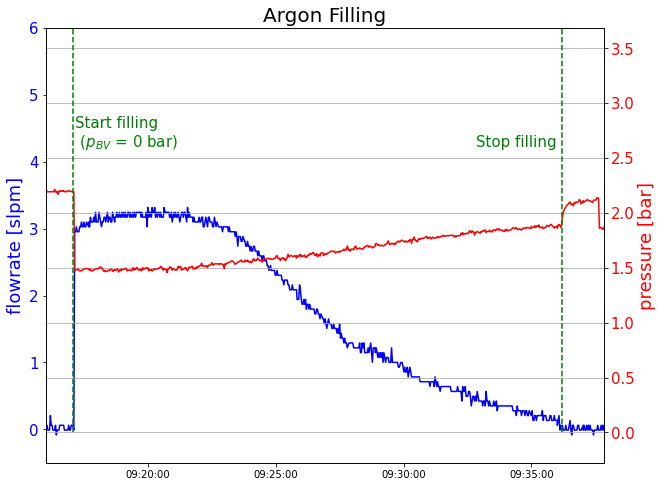

In [10]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftAr = dt.datetime(2021, 6, 8, 9, 16)
rightAr = dt.datetime(2021, 6, 8, 9,37,50)

plt.gca().set_xbound(leftAr, rightAr)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftAr, rightAr)
plt.yticks(fontsize = 15, color='red')

x_0Ar = dt.datetime(2021, 6, 8, 9, 17,5)
x_0Ar_ = dt.datetime(2021, 6, 8, 9, 17,9)
x_1Ar = dt.datetime(2021, 6, 8, 9, 23)
x_2Ar = dt.datetime(2021, 6, 8, 9, 28,20)
x_3Ar = dt.datetime(2021, 6, 8, 9, 36,13)
x_3Ar_ = dt.datetime(2021, 6, 8, 9, 32,50)

plt.axvline(x_0Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_1Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_2Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

x_pos = x_0Ar_
x_pos2_ = x_3Ar_
y_pos = 2.6
plt.text(x_pos, y_pos, "Start filling \n ($p_{BV}$ = 0 bar)", color='green',fontsize=15)
plt.text(x_pos2_, y_pos, "Stop filling", color='green',fontsize=15)

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Argon Filling', fontsize = 20)

plt.grid()
plt.savefig("Argon_filling.png")

plt.show()

In [11]:
print(f'Argon result')

resultAr = []
resultAr_std = []
result2Ar = []
result2Ar_std = []
result3Ar = []
result3Ar_std = []

print(f'First interval:')
resultAr, resultAr_std  = integrated_flow(time_list2, flowrate2, x_0Ar, x_1Ar)
print(f'Second interval:')
result2Ar, result2Ar_std  = integrated_flow(time_list2, flowrate2, x_1Ar, x_2Ar)
print(f'Third interval:')
result3Ar, result3Ar_std  = integrated_flow(time_list2, flowrate2, x_2Ar, x_3Ar)
print(f'\nTot result')
tot_int_flowAr = resultAr + result2Ar + result3Ar
std_flowAr = resultAr_std + result2Ar_std + result3Ar_std
print(f'Integrated flow: {tot_int_flowAr} +- {std_flowAr} SL')

print(f'Check integrated flow (the whole interval):')
result_checkAr, std_checkAr = integrated_flow(time_list2, flowrate2, x_0Ar, x_3Ar)
mean_flowAr, mean_std_flowAr = mean_fl(time_list2, flowrate2, x_0Ar, x_3Ar)
print(f'Mean flow: {mean_flowAr} +- {mean_std_flowAr} slpm')

print(f'\nPressure results:')
p_ressAr = delta_p(time_list2, flowrate2, x_0Ar, x_3Ar, p_low2)

Argon result
First interval:
Integrated flow: 18.16713333333344 +- 0.2533717889643426 SL
Second interval:
Integrated flow: 10.998033333333364 +- 0.5647219430627708 SL
Third interval:
Integrated flow: 4.550733333333333 +- 0.33346517858303326 SL

Tot result
Integrated flow: 33.71590000000013 +- 1.1515589106101465 SL
Check integrated flow (the whole interval):
Integrated flow: 33.71589999999997 +- 1.1559819344150253 SL
Mean flow: 1.7933989361702132 +- 1.1559819344150253 slpm

Pressure results:
P end = 1.954 bar
delta_p is = 1.954 +- 0.001 bar


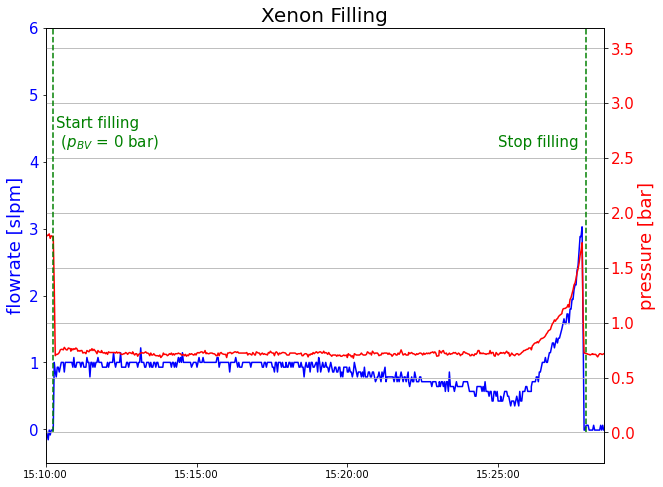

In [12]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftXe = dt.datetime(2021, 6, 8, 15, 10)
rightXe = dt.datetime(2021, 6, 8, 15, 28,30)

plt.gca().set_xbound(leftXe, rightXe)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftXe, rightXe)
plt.yticks(fontsize = 15, color='red')

x_0Xe = dt.datetime(2021, 6, 8, 15, 10, 15)
x_0Xe_ = dt.datetime(2021, 6, 8, 15, 10,20)
x_1Xe = dt.datetime(2021, 6, 8, 15, 20)
x_2Xe = dt.datetime(2021, 6, 8, 15, 25,33)
x_3Xe = dt.datetime(2021, 6, 8, 15, 27,54)
x_3Xe_ = dt.datetime(2021, 6, 8, 15, 25)

plt.axvline(x_0Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_1Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
#plt.axvline(x_2Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

x_pos = x_0Xe_
x_pos2_ = x_3Xe_
y_pos = 2.6
plt.text(x_pos, y_pos, "Start filling \n ($p_{BV}$ = 0 bar)", color='green',fontsize=15)
plt.text(x_pos2_, y_pos, "Stop filling", color='green',fontsize=15)


plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Xenon Filling', fontsize = 20)

plt.grid()
plt.savefig("Xe_filling.png")

plt.show()

In [13]:
print(f'Xenon result')

resultXe = []
resultXe_std = []
result2Xe = []
result2Xe_std = []
result3Xe = []
result3Xe_std = []

print(f'First interval:')
resultXe, resultXe_std = integrated_flow(time_list2, flowrate2, x_0Xe, x_1Xe)
print(f'Second interval:')
result2Xe, result2Xe_std = integrated_flow(time_list2, flowrate2, x_1Xe, x_2Xe)
print(f'Third interval:')
result3Xe, result3Xe_std = integrated_flow(time_list2, flowrate2, x_2Xe, x_3Xe)
print(f'\nTot result')
tot_int_flowXe = resultXe + result2Xe + result3Xe
std_flowXe = resultXe_std + result2Xe_std + result3Xe_std
print(f'Integrated flow: {tot_int_flowXe} +- {std_flowXe} SL')

print(f'Check integrated flow (the whole interval):')
result_checkXe, std_checkXe = integrated_flow(time_list2, flowrate2, x_0Xe, x_3Xe)

mean_flowXe, mean_std_flowXe  = mean_fl(time_list2, flowrate2, x_0Xe, x_3Xe)
print(f'Mean flow: {mean_flowXe} +- {mean_std_flowXe} slpm')

print(f'\nPressure results:')
p_ressXe = delta_p(time_list2, flowrate2, x_0Xe, x_3Xe, p_low2)

Xenon result
First interval:
Integrated flow: 9.314599999999905 +- 0.08150670718396272 SL
Second interval:
Integrated flow: 3.79543333333332 +- 0.1319236228933947 SL
Third interval:
Integrated flow: 2.7922333333333342 +- 0.6904284533415995 SL

Tot result
Integrated flow: 15.902266666666558 +- 0.903858783418957 SL
Check integrated flow (the whole interval):
Integrated flow: 15.862033333333196 +- 0.3177721215442988 SL
Mean flow: 0.9133608445297505 +- 0.3177721215442988 slpm

Pressure results:
P end = 0.723 bar
delta_p is = 0.723 +- 0.001 bar


In [14]:
flow_meter = [tot_int_flow, tot_int_flow_, tot_int_flowAr, tot_int_flowXe]
flow_meter_error = [std_flow, std_flow_,std_flowAr, std_flowXe]

flow_meter_ = [result_check, result_check_, result_checkAr, result_checkXe]
flow_meter_error_ = [std_check,std_check_,std_checkAr,std_checkXe]

mean_flow_array = [mean_flowNi, mean_flowNi_, mean_flowAr, mean_flowXe]
mean_flow_array_err = [mean_std_flowNi, mean_std_flowNi_, mean_std_flowAr, mean_std_flowXe]

delta_p = [p_ress[1], p_ress_[1], p_ressAr[1],p_ressXe[1]]
delta_p_err = 0.001 # bar

bv = 16.0 # Liters
bv_err = 0.1 # Liters

flow_bv = [bv*p_ress[0], bv*p_ress_[0], bv*p_ressAr[0], bv*p_ressXe[0]] 

gcf = [flow_meter[0]/flow_bv[0], flow_meter[1]/flow_bv[1], flow_meter[2]/flow_bv[2], flow_meter[3]/flow_bv[3]]
gcf2 = [flow_meter_[0]/flow_bv[0], flow_meter_[1]/flow_bv[1], flow_meter_[2]/flow_bv[2], flow_meter_[3]/flow_bv[3]]

In [15]:
################################################################################################################################
#Error propagation function
################################################################################################################################

def err_prop(tot_value, value1, err1, value2, err2):
    
    err_rel1 = ((err1/value1) ** 2)
    err_rel2 = ((err2/value2) ** 2)
    
    sum_rel = err_rel1 + err_rel2
    
    err_sqrt = np.sqrt(sum_rel)
    
    err_tot = tot_value * err_sqrt
    
    return err_tot

In [16]:
# We calculate before the error in the denominator as the FACTOR DIFFERENCE = Flow Meter Volume / (BV * Delta_p)

flow_bv_err = []

for i in range(0,4):
    flow_bv_err.append(err_prop(flow_bv[i], bv, bv_err, delta_p[i], delta_p_err))

# Then we calculate the Factor error
gcf_err = []

for i in range(0,4):
    gcf_err.append(err_prop(gcf2[i], flow_meter_[i], flow_meter_error[i], flow_bv[i], flow_bv_err[i]))

In [17]:
df = pd.DataFrame()

meas = ['Nitrogen (GCF=1.383)', 'Nitrogen (GCF=1)', 'Argon (GCF=1)', 'XENON (GCF=1)']

df['Measurement'] = meas
df['Delta p [bar]'] = delta_p
#df['Flow meter [SL] (intervals)'] = flow_meter
df['Flow meter Volume [SL]'] = flow_meter_
#df['Flow meter Volume [SL] [error]'] = flow_meter_error_
df['Buffer volumes [L]'] = bv
df['BV Volume [SL]'] = flow_bv
#df['GCF (intervals)'] = gcf
df['Factor difference'] = gcf2
df['Factor difference error'] = gcf_err
df['Mean flow [slpm]'] = mean_flow_array
df['Mean flow error [slpm]'] = mean_flow_array_err

df

,Measurement,Delta p [bar],Flow meter Volume [SL],Buffer volumes [L],BV Volume [SL],Factor difference,Factor difference error,Mean flow [slpm],Mean flow error [slpm]
0,Nitrogen (GCF=1.383),1.914,41.723450,16.0,30.624,1.362443,0.053167,1.989990,2.001693
1,Nitrogen (GCF=1),1.890,41.700233,16.0,30.240,1.378976,0.062989,2.617169,1.966826
2,Argon (GCF=1),1.954,33.715900,16.0,31.264,1.078426,0.037449,1.793399,1.155982
3,XENON (GCF=1),0.723,15.862033,16.0,11.568,1.371199,0.078626,0.913361,0.317772


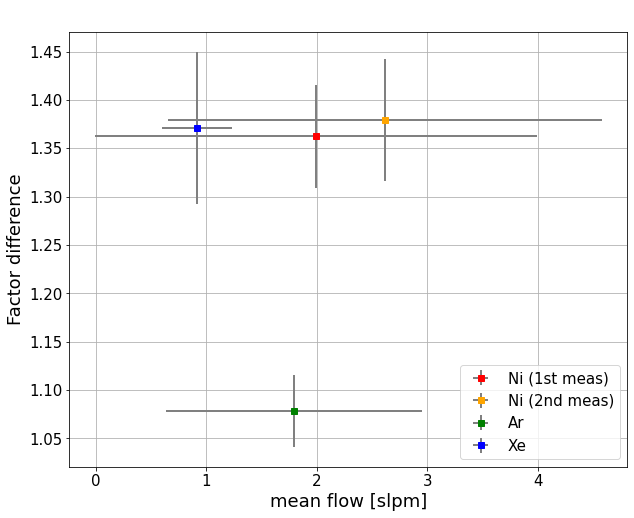

In [18]:
from matplotlib.colors import ListedColormap
from matplotlib import container

fig, ax = plt.subplots(figsize=(10, 8))

classes = ['Ni (1st meas)', 'Ni (2nd meas)', 'Ar', 'Xe']
colours = ['red','orange','green','blue']

for i in range(len(mean_flow_array)):
    ax.errorbar(mean_flow_array[i], gcf2[i], xerr=mean_flow_array_err[i], yerr=gcf_err[i], 
                label=classes[i], color=colours[i], ecolor='gray', elinewidth=2, fmt='s')

handles, classes = ax.get_legend_handles_labels()
# handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles] this is to avoid error bars in the points legend

ax.legend(handles, classes, loc='lower right', fontsize=15)

plt.title(' ', fontsize = 25)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('mean flow [slpm]',fontsize=18)
plt.ylabel('Factor difference',fontsize=18)

ax.grid(True)

#plt.savefig("cal_curve.png")


plt.show()    

In [ ]:
# Plot without error bar
# from matplotlib.colors import ListedColormap

# fig, ax = plt.subplots(figsize=(10, 8))

# classes = ['Ni (1st meas)', 'Ni (2nd meas)', 'Ar', 'Xe']
# values = [0, 1, 2, 3]
# colours = ListedColormap(['red','orange','green','blue'])
# scatter = plt.scatter(mean_flow_array, gcf2,c=values, cmap=colours, marker='s', alpha=0.7)
# plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='lower right',fontsize=18)

# plt.yticks(fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.xlabel('mean flow [slpm]',fontsize=18)
# plt.ylabel('GCF',fontsize=18)

# plt.title(' ', fontsize = 25)

# ax.grid(True)

# plt.savefig("cal_curve.png")
# plt.show()